# Programs, Programming Languages, Programming

## Programs

A *program* is a sequence of instructions that specifies how to perform a computation.

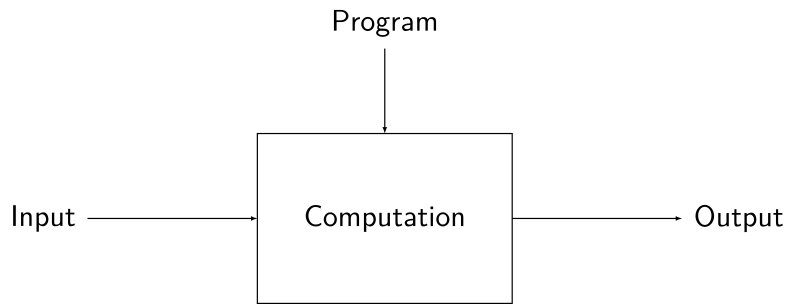

In [1]:
using TikzPictures
TikzPicture(L"""
    \draw (2,0) -- (5,0) -- (5,2) -- (2,2) -- cycle;
    \draw[-latex] (0,1) node[left] {Input} -- (2,1);
    \node[align=center] at (3.5,1) {Computation};
    \draw[-latex] (5,1) -- (7,1) node[right] {Output};
    \draw[-latex] (3.5,3) node[above] {Program} -- (3.5,2);
"""; options="very thick, scale=3, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
""")

Following instructions are fundamental:

- *input*: get data from the keyboard, a file, or some other device
- *output*: display data on the screen or send data to a file or an other device
- *math*: perform basic mathematical operations like addition and multiplication
- *conditional execution*: check for certain conditions and execute the appropriate sequence of instructions

These instructions correspond with the symbolic instructions provided by the instruction set of the computer, which we will call *low-level language* or *assembly*. 

It is all that is needed to perform a general computation in the sense of Turing.

## Programming Languages

We don't want to write a program in assembly:

- programming in assembly is tedious and errorprone (you need to know all the gory details...)
- assembly is not portable (you have to start over if you want to use a CPU with another instruction set)

i.e. we need a *high-level programming language*.

A high-level programming language introduces supplementary instructions:

- *repetition*: perform a sequence of instructions repeatedly, usually with some variation

Believe it or not, that's pretty much all there is to it. Every program you've ever used, no matter how complicated, is made of instructions that look more or less like these.

## Programming and Algorithms

*Programming* is the process of breaking a large, complex task into smaller and smaller subtasks until the subtasks are simple enough to be performed with sequences of the basic instructions.

As we progress through this course, you will notice that although the particulars of the source code change from one problem area to the next, certain patterns will emerge in the approach we take.

An *algorithm* is a mechanical (no intelligence required) sequence of instructions for solving a specific problem, eg. Newton's method for root solving. Executing an algorithm is boring, but designing them is interesting, intellectual challenging, and a central part of this course.

# From Source Code to Executable

The statements in a high-level programming language have to be translated to instructions that the CPU can execute. There are two ways to do this translation: *interpreting* or *compiling*.

An interpreter is a program that reads a high level program and does what it says, eg. a Jupyter notebook. In effect, it translates the program line-by-line, alternately reading lines and carrying out commands.

A compiler is a program that reads a high level program and translates it all at once, before executing any of the commands. Often you compile the program as a separate step, and then execute the compiled code later. In this case the high level program is called the *source code* and the translated program is called the *object code* or *executable*.

Historically compiled programs performed better, i.e. ran faster, than interpreted programs. Because the compilation step and the execution are decoupled, a compiler could work longer and generate better object code. The runtime overhead is also less. An interpreter allows to use runtime information during translation what makes it more flexible and easier to use. A command-line interface (or Jupyter notebook) allows to dynamically execute statements.

Nowadays with *Just-In-Time* (JIT) compilation we can use the flexibility of an interpreter with the performance of a compiler: the source code is compiled at runtime. We have however the overhead of both an interpreter and a compiler.

We will use 4 programming languages to illustrate the most important programming techniques:

- Matlab (Octave): uses a JIT compiler (experimental for Octave)
- Python: uses an interpreter
- Julia: uses a JIT compiler
- C++: (gcc, clang) uses a compiler or (cling for Jupyter notebook) a JIT compiler

# The First Program

Traditionally, the first program you write in a new language is called `helloworld` because all it does is display the words "Hello, World!".

Matlab (Octave):
```octave
disp('Hello, World!')
```
Python:
```python
print('Hello, World!')
```
Julia:
```julia
println("Hello, World!")
```
C++:
```c++
#include <iostream>
int main () {
  std.cout << "Hello, World!" << std.endl; 
}
```



# Debugging

## Formal Language

A high-level language is a formal language, i.e. designed by people for a specific application, in our case to express computations.

Formal languages have strict rules about *syntax*, eg. $\mathrm{H_2O}$ is a syntactically correct chemical name, but $\mathrm{_2Zz}$ is not.

Syntax rules come in two flavors, pertaining to *tokens* and *structure*. Tokens are the basic elements of the language, such as words, numbers, parentheses, commas, and so on. In Python, a statement like

```python
print("Happy New Year for ", 2018)
```

has 6 tokens: a function name, an open parenthesis, a string, a comma, a number, and a close parenthesis.

It is possible to make errors in the way one constructs tokens, eg.

```python
"Happy New Year for 
```

is not a legal string token.

It is also possible to make errors in the way the tokens are arranged, i.e. the structure of a statement; eg.

```python
print)"Happy New Year for", 2018(
```

has an illegal structure.

When you read a sentence in a natural language or a statement in a formal language, you have to figure out what the structure of the sentence is. This process is called *parsing*.

Once you have parsed a sentence, you can figure out what it means, or the *semantics* of the sentence.

# Program Design

## Top-down Design

*Top-down design* is the process of starting with a large task and breaking it down into smaller, more easily understandable pieces (subtask) that perform a portion of the desired task. Each subtask may in turn be subdivided into smaller subtasks if necessary. Once the program is divided into small pieces, each piece can be coded and tested independently. We do not attemmpt to combine the subtasks into a complete task until each of the subtasks has been verified to work properly by itself.

The concept of top-down design is the basis of our formal program design process.

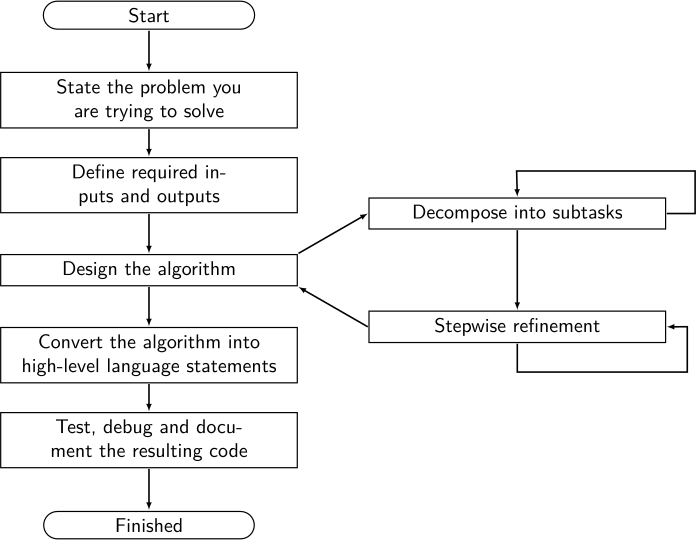

In [33]:
TikzPicture(L"""
    \node (start) [draw, terminal, text width=3cm] {Start};
    \node (problem) [draw, process, below of=start] {State the problem you are trying to solve};
    \node (inout) [draw, process, below of=problem] {Define required inputs and outputs};
    \node (algorithm) [draw, process, below of=inout] {Design the algorithm};
    \node (code) [draw, process, below of=algorithm] {Convert the algorithm into high-level language statements};
    \node (test) [draw, process, below of=code] {Test, debug and document the resulting code};
    \node (finish) [draw, terminal, below of=test, text width=3cm] {Finished};
    \node (decomposition) [draw, process, right of=algorithm, xshift=5cm, yshift=1cm] {Decompose into subtasks};
    \node (stepwise) [draw, process, right of=algorithm, xshift=5cm, yshift=-1cm] {Stepwise refinement};
    \draw [arrow] (start) -- (problem);
    \draw [arrow] (problem) -- (inout);
    \draw [arrow] (inout) -- (algorithm);
    \draw [arrow] (algorithm) -- (code);
    \draw [arrow] (code) -- (test);
    \draw [arrow] (test) -- (finish);
    \draw [arrow] (algorithm.north east) -- (decomposition.west);
    \draw [arrow] (decomposition) -- (stepwise);
    \draw [arrow] (stepwise.west) -- (algorithm.south east);
    \draw [arrow] (decomposition.east) -- +(0.5,0) -- +(0.5,0.75) -- +(-2.65,0.75) -- (decomposition.north);
    \draw [arrow] (stepwise.south) -- +(0,-0.5) -- +(3,-0.5) -- +(3,+0.3) -- (stepwise.east);
"""; options="very thick, scale=2, transform shape, node distance=1.5cm, text width=5cm, text centered", preamble="""
    \\usepackage{newtxmath}
    \\usepackage{flowchart}
    \\usetikzlibrary{arrows}
    \\tikzstyle{arrow} = [ultra thick,-latex]
    \\renewcommand{\\familydefault}{\\sfdefault}
""")

### Problem statement

Programs are usually written to fill some perceived need, but that need may not be articulated clearly by the person requesting the program. 

Eg. a user may ask for a program to solve a system of linear equations. This request in not clear enough to allow a programmer to design a program to meet the need; he or she must first know much more about the problem to be solved. Is the system of equations real or complex? What is the maximum number of equations that the program must handle? Are there any symmetries in the equations that might be exploited to make the task easier? The program designer will have to talk with the user requesting the program, and the two of them will have to come up with a clear statement of exactly what they are trying to accomplish. A clear statement of the problem will prevent misunderstandings, and it will also help the program designer to properly organize his or her thoughts;

*Design and write a program to solve a system of linear equations having real coefficients and with up to 20 equations in 20 unknowns.*

### Define inputs and outputs

The inputs to the program and the outputs produced by the program must be specified so that the new program will properly fit into the overall processing scheme.

In the example, the coefficients of the equations to be solved are probably in some pre-existing order, and our new program needs to be able to read thme in that order. Similarly, it needs to produce the answer required by the programs that may follow in thet overall processing scheme, and to write out those answers in the format needed by the programs following it.

### Design the algorithm

#### Decomposition

An algorithm is a step-by-step procedure for finding the solution to a problem. The designer looks for logical divisions within the problem, and divides it up into subtasks along those lines. This process is called *decomposition*. If the subtasks are themselves large, the designer can break them up into even smaller subtasks. This process continues until the problem has been divided into many small pieces, each of which does a simple, clearly understandable job. 

#### Stepwise refinement

After the problem has been decomposed into small pieces, each piece is further refined through a process called *stepwise refinement*. In this process, a designer starts with a general description of what the piece of code should do, and then defines in detail the procedure so that it is specific enough to be turned into high-level language statements. This is often done with flowcharts.

### Convert into high-level language statements

If the decomposition and refinement process is carried out properly, this step will be very simple. All the programmer will have to do is to replace the flowchart elements with the corresponding high-level statements on a one-for-one basis.

### Test, debug and document

This step is the real killer. The components of the program must first be tested individually, if possible, and then the program as a whole must be tested. When testing a program, we must verify that it works correctly for *all legal input data sets*. If the algorithm implemented in a program includes different branches, we must test all of the possible branches to confirm that the program operates correctly under every possible circumstance.

#### Unit testing

The first stage of testing is called *unit testing*. During unit testing, the individual subtasks of the program are tested separately to confirm that they work correctly. The programmer usually writes small programs called *stubs* to execute the code under test, and to see if the code is returning the proper results. This verifies the operation of the subtasks at a basic level before they are combined into larger groups.

#### Builds

After the unit testing is completed, the program goes through a series of builds during which the individual subtasks are combined to produce the final program. The first build of the program typically includes only a few of the subtasks. It is used to check the interactions among those subtasks and the functions performed by the combination of the subtasks. In successive builds, more and more subtasks are addedn until the entire program is complete. Testing is performed on each build, and any errors (bugs) that are detected are corrected before moving on to the next build.

#### Alpha release

The first complete version of the program is called the *alpha release*. It is exercised by the programmer in as many ways as possible, and the bugs discovered during the testing are corrected.

#### Beta release

When the most serious bugs have been removed from the program, a new version called the *beta release* is prepared. This release is normally given to users who have a need for the program. These users put the program through its paces under many different conditions and with many different input data sets, and they report any bugs that they find to the programmers. When those bugs have been corrected, the program is ready to be released for general use.

### Documentation

*Comments* inside a program are indended to help you and others understand program design and how it is organised. Program comments occur in the midst of the program's source and temporarily interrupt the highly restricted syntax of a high-level programming language. Comments are entirely ignored by the interpreter or compiler and are allowed to enhance program clarity for humans.

Not only comments are include in the source but also *Docstrings* that describe to a user how to use the program (function):

- what the program (function) does
- all user options of the program (function)
- descriptions of what error messages mean

## Structured Programming

As a part of the design process, it is necessary to describe the algorithm that you intend to implement. This description should be in a standard form that is easy for both you and other people to understand, and the description should aid you in turning your concept in high-level language statements.

The standard forms that we use to describe the algorithms are called *constructs*, and an algorithm described using these constructs is called a *structured algorithm*. When the algorithm is implemented in a high-level language, the resulting program is called a *structured program*.

### Flowcharts

*Flowcharts* are a way to describe algorithms graphically. In a flowchart, different graphical symbols represent the different operations in the algorithm, and our standard constructs are made up of collections of one or more of these symbols.

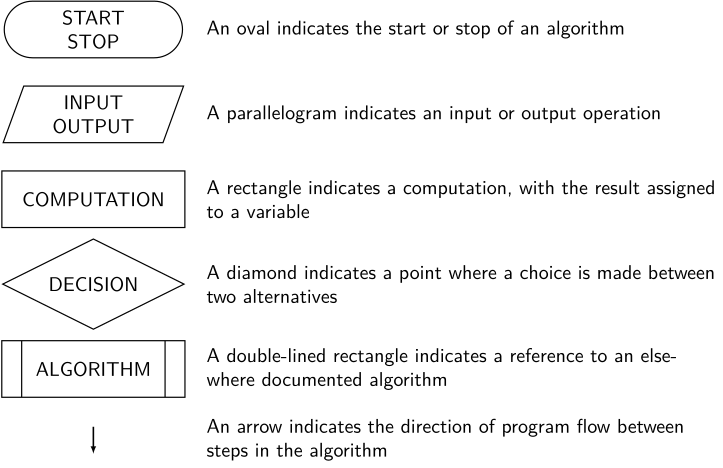

In [97]:
TikzPicture(L"""
    \node (terminal)[draw, terminal, text width=2cm, text centered] {START STOP};
    \node (io)[draw, io, below of=terminal, text width=2cm, text centered] {INPUT OUTPUT};
    \node (process) [draw, process, below of=io, text width=3cm, text centered] {COMPUTATION};
    \node (decision) [draw, decision, below of=process, text width=2cm, text centered] {DECISION};
    \node (predproc) [draw, predproc, below of=decision, text width=2.3cm, text centered] {ALGORITHM};
    \node (arrow) [below of=predproc, yshift=1cm] {};
    \draw [arrow] (arrow) -- +(0, -1);
    \node [text width=9cm, right of=terminal, xshift=5cm] {An oval indicates the start or stop of an algorithm};
    \node [text width=9cm, right of=io, xshift=5cm] {A parallelogram indicates an input or output operation};
    \node [text width=9cm, right of=process, xshift=5cm] {A rectangle indicates a computation, with the result assigned to a variable};
    \node [text width=9cm, right of=decision, xshift=5cm] {A diamond indicates a point where a choice is made between two alternatives};
    \node [text width=9cm, right of=predproc, xshift=5cm] {A double-lined rectangle indicates a reference to an elsewhere documented algorithm};
    \node [text width=9cm, right of=arrow, xshift=5cm, yshift=-0.75cm] {An arrow indicates the direction of program flow between steps in the algorithm};
"""; options="very thick, scale=2, transform shape, node distance=1.5cm, minimum height=1cm", preamble="""
    \\usepackage{newtxmath}
    \\usepackage{flowchart}
    \\usetikzlibrary{shapes.geometric, arrows}
    \\tikzstyle{arrow} = [ultra thick,-latex]
    \\tikzstyle{io} = [trapezium, trapezium left angle=70, trapezium right angle=110]
    \\tikzstyle{decision} = [diamond, aspect=2]
    \\renewcommand{\\familydefault}{\\sfdefault}
""")